In [17]:
import pandas as pd
import numpy as np;
from scipy.stats import norm
from scipy.stats import mannwhitneyu
import math
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns

#Importing the data from excel file
df = pd.read_excel(r'C:\Users\advay\OneDrive\Desktop\PhD\Term-1\Mathematical Modelling in Chemical Engineering\Project\Math data.xlsx')

In [18]:
label = df['County'] #Names of the counties of Pennsylvania
y = (df['Infected_People'])  #Total number of COVID infected people
x1_data = df['Population_Density']   #Poplution density per square mile
x2_data = df['AQI']  #Air Quality Index county-wise

#Taking the data in adaptabel format to fit into the equation
x1 = np.log(x1_data)  #Log of Poplution density
x2 = x2_data  #AQI county-wise

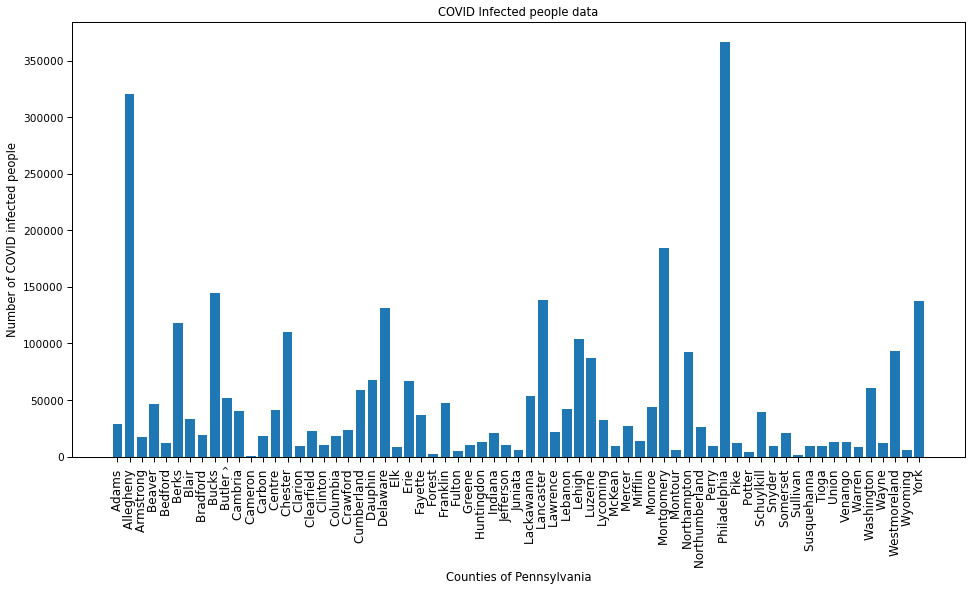

In [19]:
#Determining the figure dimension
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(8)  

x_pos = np.arange(len(label))
 
#Plotting bar graph for Total number of COVID infected people in each county of Pennsylvania
plt.bar(x_pos, y)
    
# Add title and axis names
plt.title('COVID Infected people data')
plt.xlabel('Counties of Pennsylvania')
plt.ylabel('Number of COVID infected people')
 
# Create names on the x axis
plt.xticks(x_pos, label,  rotation=90, size = 12)

# Show graph
plt.show()

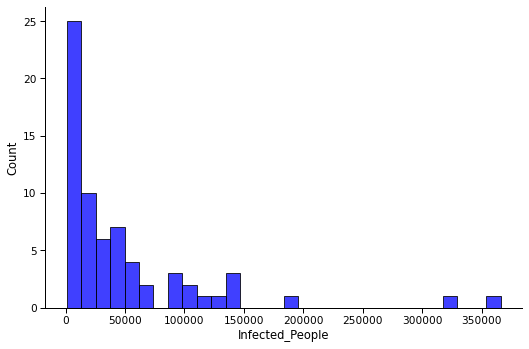

In [20]:
#To detemine the distribution of the COVID infected data (y)
sns.set_context("paper", font_scale = 1.2);
#Plotting the bar graph for the data distribution
sns.displot(data=df, x="Infected_People", kind="hist", bins = 30, aspect = 1.5, color='b');

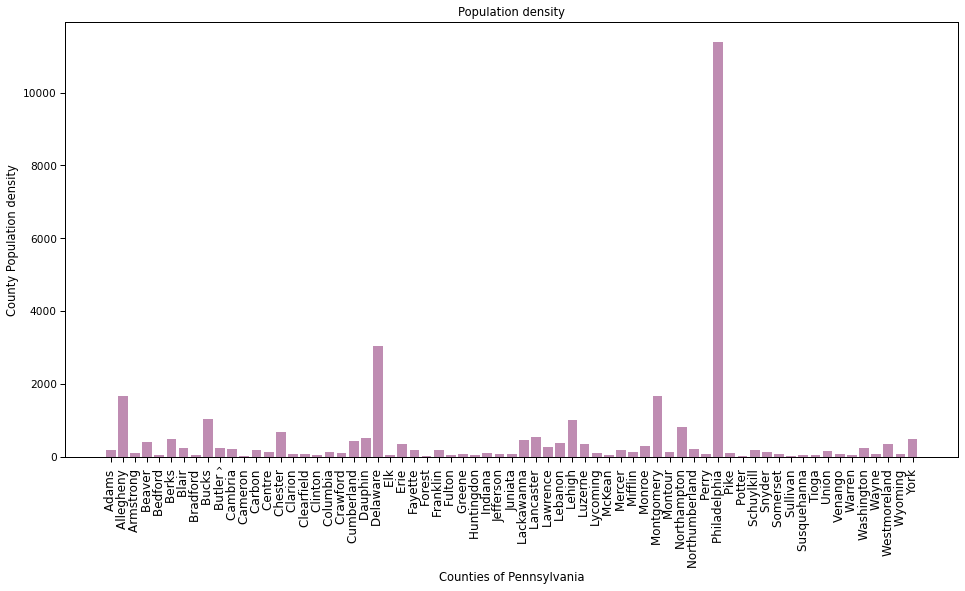

In [21]:
#Determining the figure dimension
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(8)  

x_pos = np.arange(len(label))

#Plotting bar graph for Population density of each county in Pennsylvania
plt.bar(x_pos, x1_data, color = (0.5,0.1,0.4,0.5))
    
# Add title and axis names
plt.title('Population density')
plt.xlabel('Counties of Pennsylvania')
plt.ylabel('County Population density')
 
# Create names on the x axis
plt.xticks(x_pos, label,  rotation=90, size = 12)

# Show graph
plt.show()

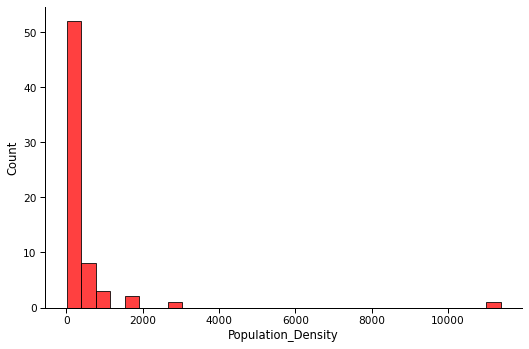

In [22]:
#To detemine the distribution of the population density of each county (x1)
sns.set_context("paper", font_scale = 1.2);
#Plotting the bar graph for the data distribution
sns.displot(data=df, x="Population_Density", kind="hist", bins = 30, aspect = 1.5, color='r');

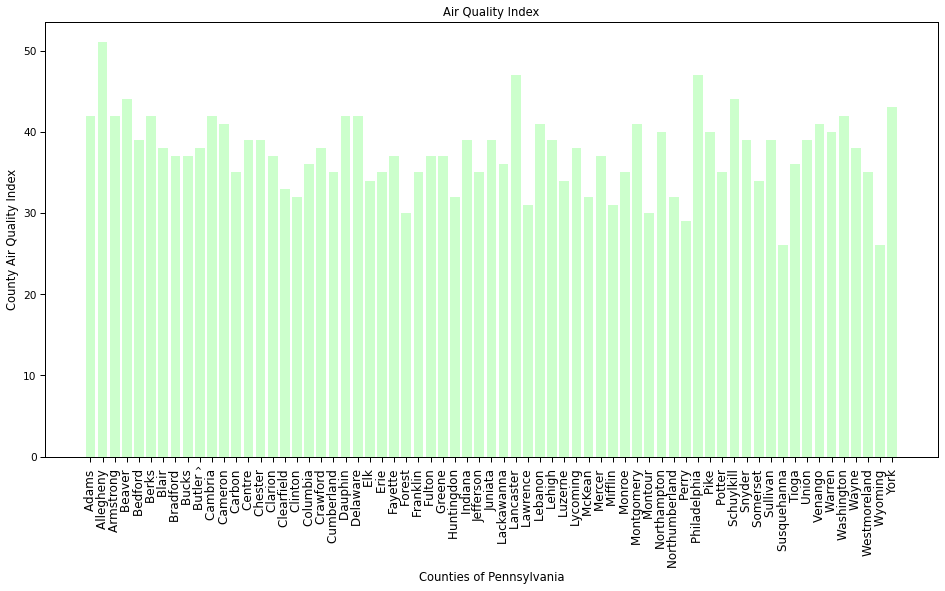

In [23]:
#Determining the figure dimension
f = plt.figure()
f.set_figwidth(16)
f.set_figheight(8)  

x_pos = np.arange(len(label))

#Plotting bar graph for Air quality index of each county in Pennsylvania
plt.bar(x_pos, x2_data,color = (0.5,1,0.5,0.4))
    
# Add title and axis names
plt.title('Air Quality Index')
plt.xlabel('Counties of Pennsylvania')
plt.ylabel('County Air Quality Index')
 
# Create names on the x axis
plt.xticks(x_pos, label,  rotation=90,size = 12)

# Show graph
plt.show()

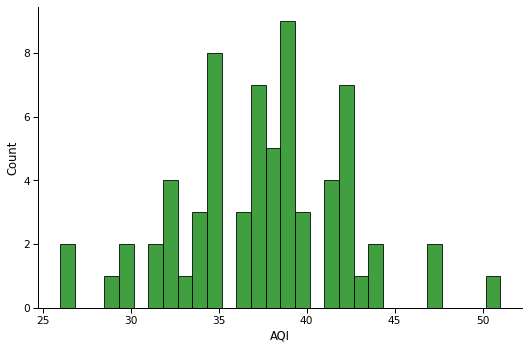

In [24]:
#To detemine the distribution of the Air quality index value of each county (x2)
sns.set_context("paper", font_scale = 1.2);
#Plotting the bar graph for the data distribution
sns.displot(data=df, x="AQI", kind="hist", bins = 30, aspect = 1.5, color='g');

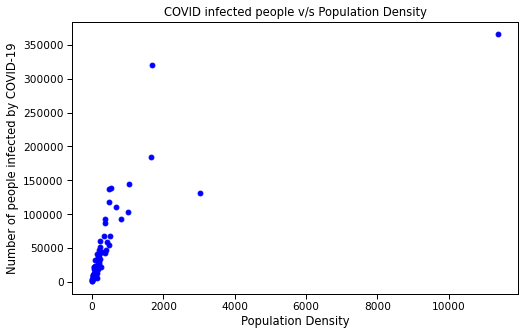

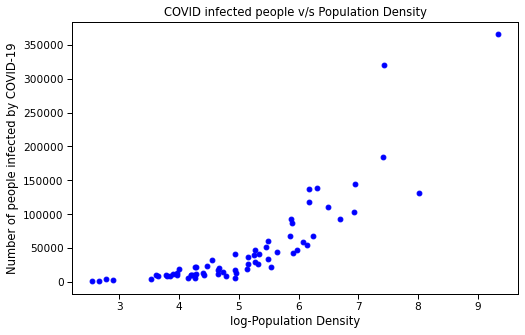

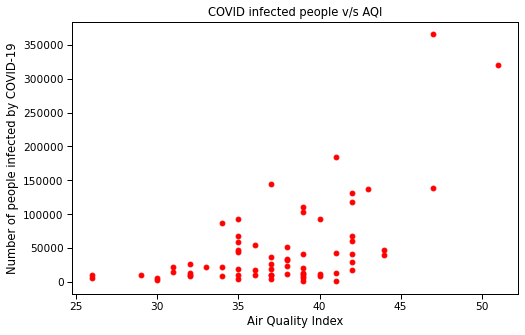

In [25]:
#Determining the figure dimension
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5) 

#Plotting Total Number of Covid cases verses Population density
plt.plot(x1_data, y,'bo')
plt.xlabel("Population Density")
plt.ylabel("Number of people infected by COVID-19")
plt.title("COVID infected people v/s Population Density")
plt.show()

#Determining the figure dimension
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

#Plotting Total Number of Covid cases verses log-Population density
plt.plot(x1, y,'bo')
plt.xlabel("log-Population Density")
plt.ylabel("Number of people infected by COVID-19")
plt.title("COVID infected people v/s Population Density")
plt.show()

#Determining the figure dimension
f = plt.figure()
f.set_figwidth(8)
f.set_figheight(5)

#Plotting Total Number of Covid cases verses Air quality Index
plt.plot(x2_data, y,'ro')
plt.xlabel("Air Quality Index")
plt.ylabel("Number of people infected by COVID-19")
plt.title("COVID infected people v/s AQI")
plt.show()


### Questions for hypothesis:

##### Q.1 Does region with higher population density leads to higher number of COVID cases?

In [40]:
df1=df['Infected_People'].loc[df['Population_Density'] < 1000] 

df2=df['Infected_People'].loc[df['Population_Density'] >= 1000]


In [41]:
print(mannwhitneyu(df1, df2, alternative="greater"))

MannwhitneyuResult(statistic=6.0, pvalue=0.999999809611028)


As, P value approaches 1, our hypothesis is true, higher population density have higher COVID cases.

##### Q2. Does the area with higher AQI have higher COVID cases in that region?

In [28]:
a = np.mean(x2)

In [29]:
df3=df['AQI'].loc[df['Population_Density'] < a] 

df4=df['AQI'].loc[df['Population_Density'] >= a]


In [30]:
print(mannwhitneyu(df3, df4, alternative="greater"))

MannwhitneyuResult(statistic=153.5, pvalue=0.7457610186853787)


## Without considering Interaction term

In [31]:
Y = np.array(y)

A=np.ones(len(Y)) #array of ones for the intercept

X1 = np.c_[A, np.array(x1), np.array(x2)];

X1 = X1.astype(int);

In [32]:
from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X1),X1))

#Solving the matrix for determining the values of coefficient of x1 and x2 along with the intercept
INTERCEPT, a, b = tmp @ np.transpose(X1) @ Y

#printing the value of the coefficients and the intercept.
print(INTERCEPT, a, b)

-225996.0814189768 34215.39329281974 3197.945731281594


In [33]:
X1 = sm.add_constant(X1) # adding a constant
model = sm.OLS(Y, X1).fit()
predictions = model.predict(X1) 

#To evaluate the statistic of the regression data
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     72.79
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           3.27e-17
Time:                        00:54:07   Log-Likelihood:                -799.19
No. Observations:                  67   AIC:                             1604.
Df Residuals:                      64   BIC:                             1611.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -2.26e+05   3.69e+04     -6.120      0.0

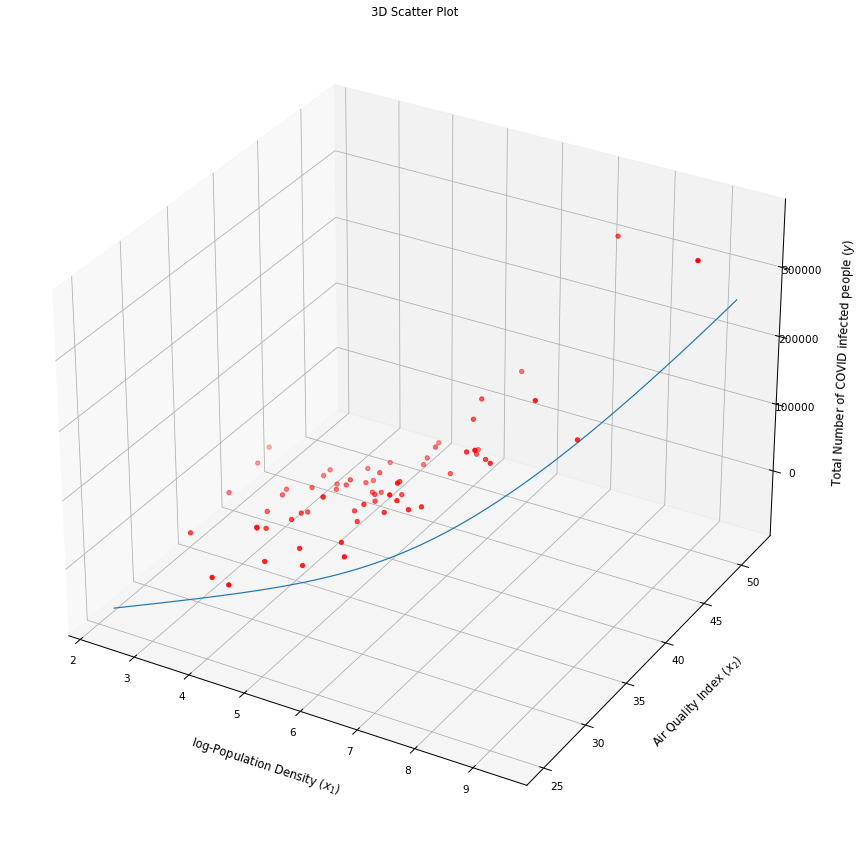

In [34]:
#Determining the figure dimension
fig = plt.figure(figsize = (15,15))
ax = plt.axes(projection='3d')
ax.grid()

# Range for the value of x1 and x2
pp = np.log(np.linspace(10,12000, 10000))
qq = np.linspace(25,52,10000)

#Plotting the data point in the space
ax.scatter( x1, x2, y, c = 'r', s = 20)
ax.set_title('3D Scatter Plot')

# Set axes label
ax.set_xlabel('log-Population Density ($x_1$)', labelpad=20)
ax.set_ylabel('Air Quality Index ($x_2$)', labelpad=20)
ax.set_zlabel('Total Number of COVID infected people ($y$)', labelpad=20)

#Assumed model and parameters from the calculation above
yp = -225996.081+34215.393*pp+3197.946*qq

#ploting the data
ax.plot3D( pp, qq, yp)

#to change the view factor of the plot
ax.azim = -60
ax.dist = 10
ax.elev = 30

plt.show()

## Considering Interaction term

In [35]:
# to determine the interaction effect 
df['inter'] = x1 * x2

In [36]:
A=np.ones(len(Y))

X2 = np.c_[A, np.array(x1), np.array(x2), np.array(x1*x2)];

X2 = X2.astype(int);

In [37]:
from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X2),X2))

#Solving the matrix for determining the values of coefficient of x1 and x2 along with interacting coefficient and the intercept
temp = (np.matmul(tmp,np.transpose(X2)))

# INTERCEPT, a, b, c = temp @ np.transpose(X1) @ Y
intercept, a, b, c = np.matmul(temp, Y)
#printing the value of the coefficients and the intercept.
print(intercept, a, b, c)

80731.4906877565 -34067.20341550773 -6274.622049721309 1863.9155372898492


In [38]:
X2 = sm.add_constant(X2) # adding a constant
model = sm.OLS(Y, X2).fit()
predictions = model.predict(X2) 

#To evaluate the statistic of the regression data 
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     96.87
Date:                Tue, 25 Oct 2022   Prob (F-statistic):           1.47e-23
Time:                        00:54:07   Log-Likelihood:                -781.14
No. Observations:                  67   AIC:                             1570.
Df Residuals:                      63   BIC:                             1579.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.073e+04   5.38e+04      1.499      0.1

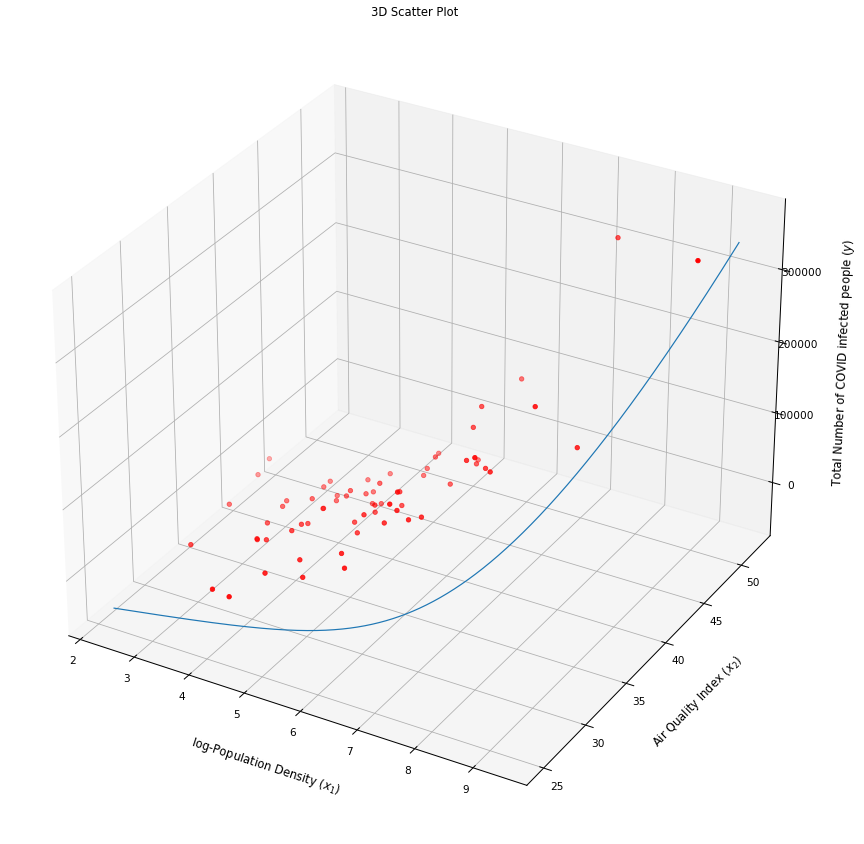

In [46]:
#Determining the figure dimension
fig = plt.figure(figsize = (15,15))
ax = plt.axes(projection='3d')
ax.grid()

# Range for the value of x1 and x2
aa = np.log(np.linspace(10,12000, 10000))
bb = np.linspace(25,52,10000)

#Plotting the data point in the space
ax.scatter(x1, x2, y, c = 'r', s = 20)
ax.set_title('3D Scatter Plot')

# Set axes label
ax.set_xlabel('log-Population Density ($x_1$)', labelpad=20)
ax.set_ylabel('Air Quality Index ($x_2$)', labelpad=20)
ax.set_zlabel('Total Number of COVID infected people ($y$)', labelpad=20)

#Assumed model and parameters from the calculation above
yp = 80731.4906877565 -34067.20341550773*aa -6274.622049721309*bb+ 1863.9155372898492*aa*bb

#ploting the data
ax.plot3D(aa, bb, yp)
# ax.set_title('3D Parametric Plot')

#to change the view factor of the plot
ax.azim = -60
ax.dist = 10
ax.elev = 30

plt.show()